In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
# Define paths
zip_file_path = '/content/drive/MyDrive/archive-3.zip'
extracted_images_path = 'archive-3'

# Step 1: Extract images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_images_path)

print(f"Images extracted to {extracted_images_path}")


Images extracted to archive-3


In [4]:
import os

# Define the path to the dataset
dataset_path = '/content/archive-3'

# List the contents of the dataset directory
files = os.listdir(dataset_path)
print("Contents of the dataset directory:")
print(files)


Contents of the dataset directory:
['test_images', 'labels_train.csv', 'train_images']


In [5]:
# List contents of the dataset directory
print("Dataset directory contents:")
print(os.listdir(dataset_path))

# List contents of the train_images directory
train_images_dir = os.path.join(dataset_path, 'train_images', 'train_images')
print("\nTrain images directory contents:")
print(os.listdir(train_images_dir))

# List contents of the test_images directory
test_images_dir = os.path.join(dataset_path, 'test_images', 'test_images')
print("\nTest images directory contents:")
print(os.listdir(test_images_dir))

Dataset directory contents:
['test_images', 'labels_train.csv', 'train_images']

Train images directory contents:
['img_4548171112109050827.jpg', 'img_8368193250717967743.jpg', 'img_5635904713270059797.jpg', 'img_7490456972471821820.jpg', 'img_3920101441213057746.jpg', 'img_4478116910924824670.jpg', 'img_7659462157972592725.jpg', 'img_5236034433619077881.jpg', 'img_2262803937801681222.jpg', 'img_7711588932118262258.jpg', 'img_4029308377980551899.jpg', 'img_2046571628753666673.jpg', 'img_6744831232934379637.jpg', 'img_7199426856402355200.jpg', 'img_6735899777087626732.jpg', 'img_4298260090862120243.jpg', 'img_2642656758193820867.jpg', 'img_699832143235819595.jpg', 'img_7643629879601682740.jpg', 'img_9186405909529543032.jpg', 'img_4128408625104402866.jpg', 'img_1536553815922830586.jpg', 'img_4968663447522130510.jpg', 'img_6412058274290212656.jpg', 'img_2918536938526392000.jpg', 'img_999221737680722212.jpg', 'img_6938291365362390763.jpg', 'img_3604010477202897366.jpg', 'img_25596663232908

In [6]:
import cv2

def get_image_stats(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp'))]
    num_images = len(image_files)
    dimensions = []
    file_sizes = []

    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            dimensions.append(img.shape[:2])
            file_sizes.append(os.path.getsize(img_path))

    return num_images, dimensions, file_sizes

# Get stats for train images
train_num_images, train_dimensions, train_file_sizes = get_image_stats(train_images_dir)
print(f"\nNumber of training images: {train_num_images}")
print(f"Sample dimensions of training images: {train_dimensions[:5]}")
print(f"Sample file sizes of training images: {train_file_sizes[:5]}")

# Get stats for test images
test_num_images, test_dimensions, test_file_sizes = get_image_stats(test_images_dir)
print(f"\nNumber of test images: {test_num_images}")
print(f"Sample dimensions of test images: {test_dimensions[:5]}")
print(f"Sample file sizes of test images: {test_file_sizes[:5]}")



Number of training images: 4672
Sample dimensions of training images: [(544, 756), (1526, 2035), (664, 1008), (444, 716), (528, 824)]
Sample file sizes of training images: [37227, 176049, 65986, 28368, 33253]

Number of test images: 1168
Sample dimensions of test images: [(1087, 1596), (1136, 1688), (608, 992), (168, 438), (1001, 1396)]
Sample file sizes of test images: [154012, 171584, 38394, 6063, 387619]



Training Image Dimension Distribution:


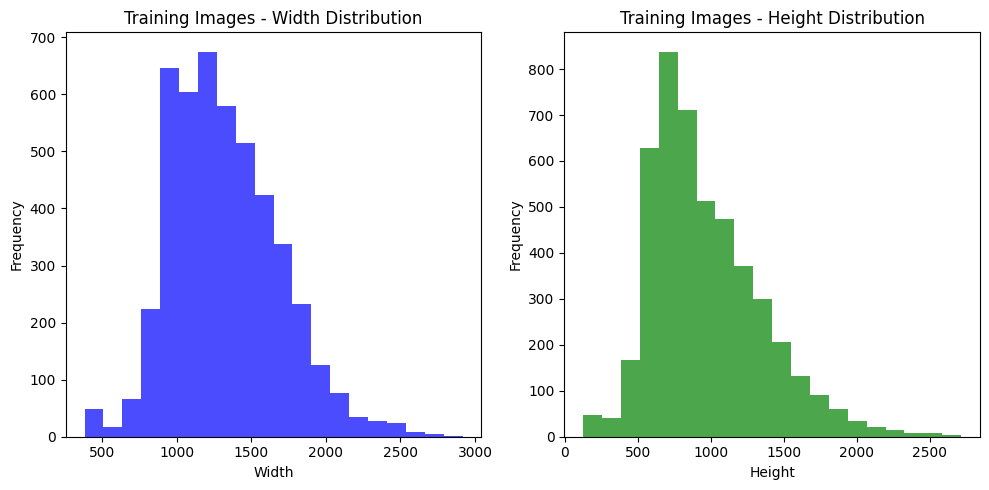

 Image Dimension Distribution:


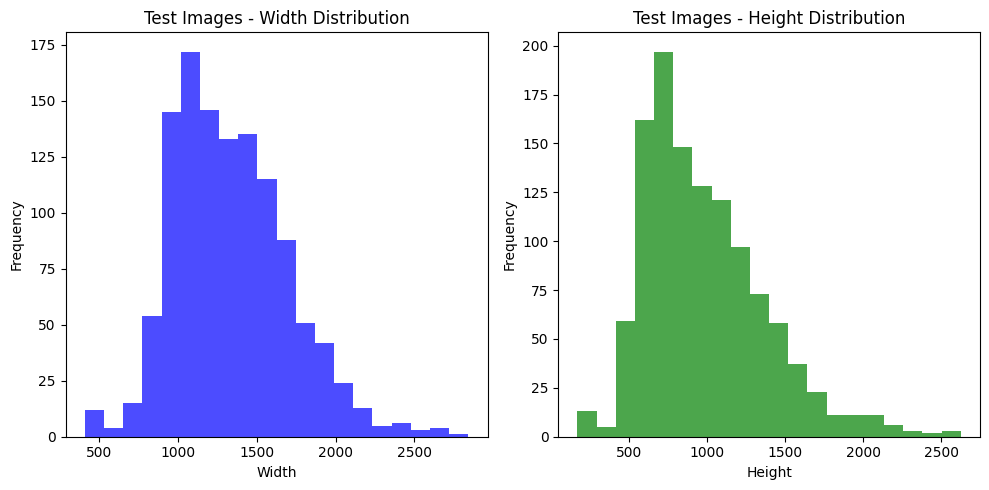

In [7]:
import matplotlib.pyplot as plt

# Function to plot distribution of image dimensions
def plot_image_dimension_distribution(dimensions, title):
    widths = [dim[1] for dim in dimensions]
    heights = [dim[0] for dim in dimensions]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title(f'{title} - Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title(f'{title} - Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot distribution for training images
print("\nTraining Image Dimension Distribution:")
plot_image_dimension_distribution(train_dimensions, "Training Images")

# Plot distribution for test images
print(" Image Dimension Distribution:")
plot_image_dimension_distribution(test_dimensions, "Test Images")



Training Image File Size Distribution:


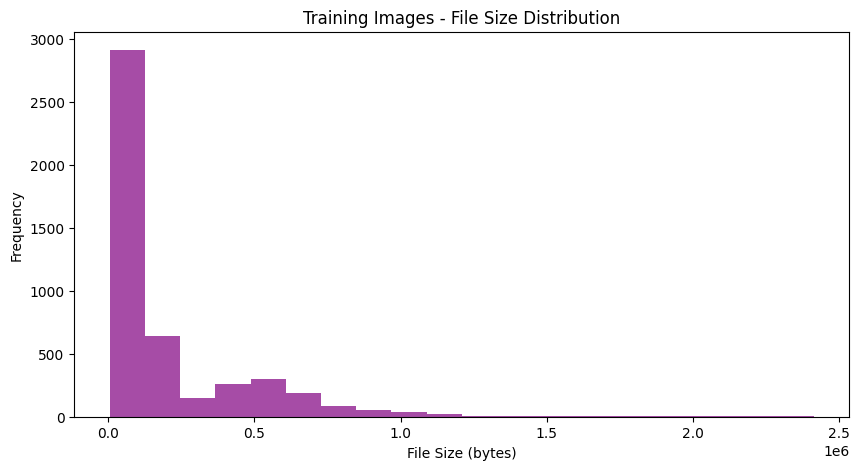


Test Image File Size Distribution:


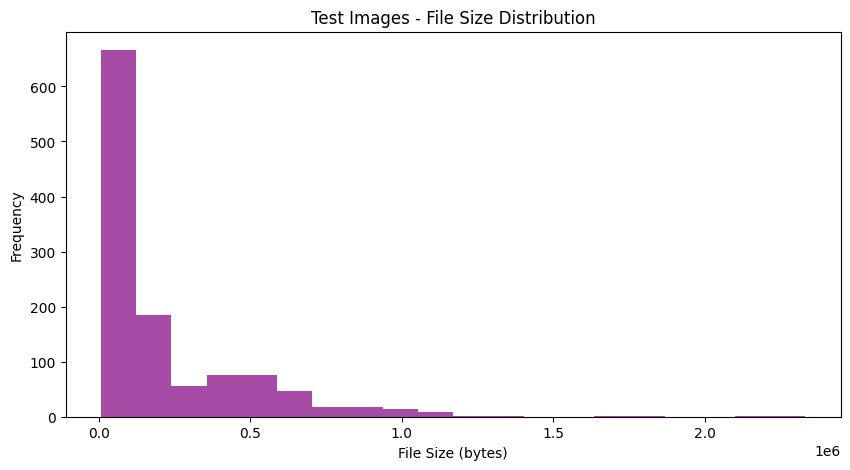

In [8]:
# Function to plot distribution of image file sizes
def plot_file_size_distribution(file_sizes, title):
    plt.figure(figsize=(10, 5))
    plt.hist(file_sizes, bins=20, color='purple', alpha=0.7)
    plt.title(f'{title} - File Size Distribution')
    plt.xlabel('File Size (bytes)')
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for training images
print("\nTraining Image File Size Distribution:")
plot_file_size_distribution(train_file_sizes, "Training Images")

# Plot distribution for test images
print("\nTest Image File Size Distribution:")
plot_file_size_distribution(test_file_sizes, "Test Images")


In [9]:
import pandas as pd

# Load labels
labels_path = os.path.join(dataset_path, 'labels_train.csv')
labels_df = pd.read_csv(labels_path)

# Display the head of the CSV
print(labels_df.head())


                     file_name  class_id
0  img_4358977458434011046.jpg         1
1  img_5224016757187192130.jpg         2
2  img_3065202206106254707.jpg         2
3  img_6304894865561547174.jpg         1
4  img_3371338542810939877.jpg         2


**To View the First 3 images in the Dataset**

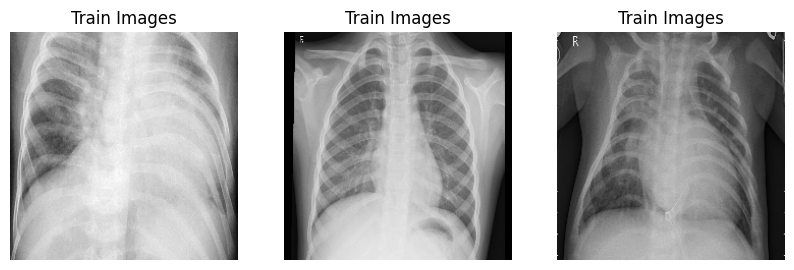

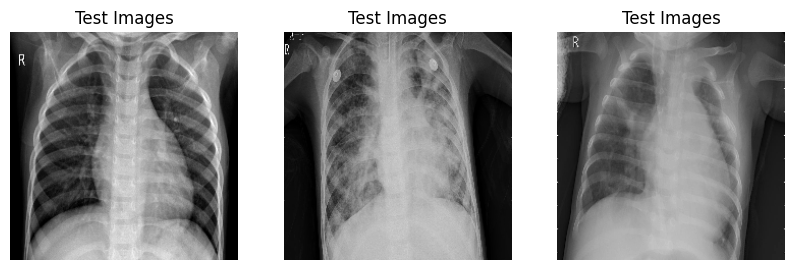

In [10]:
import matplotlib.pyplot as plt
import cv2
import os

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize for consistency
            plt.subplot(1, 3, i+1)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.axis('off')
        else:
            print(f"Warning: Unable to read image at path: {image_path}")
    plt.show()

# Display 3 images from train_images/train_images folder
train_images_dir = os.path.join(dataset_path, 'train_images', 'train_images')
train_image_files = os.listdir(train_images_dir)[:3]
train_image_paths = [os.path.join(train_images_dir, img) for img in train_image_files]
display_images(train_image_paths, "Train Images")

# Display 3 images from test_images/test_images folder
test_images_dir = os.path.join(dataset_path, 'test_images', 'test_images')
test_image_files = os.listdir(test_images_dir)[:3]
test_image_paths = [os.path.join(test_images_dir, img) for img in test_image_files]
display_images(test_image_paths, "Test Images")


**Creating a class for the label so the Images can be labelled, create directories for each class (0, 1, 2) inside a new directory called labeled_train_images.**

In [11]:
import os
import shutil

# Define the new directory for labeled images
labeled_train_images_path = os.path.join(dataset_path, 'labeled_train_images')

# Create directories for each class
for class_id in range(3):
    class_dir = os.path.join(labeled_train_images_path, str(class_id))
    os.makedirs(class_dir, exist_ok=True)

print(f"Directories for classes created in {labeled_train_images_path}")


Directories for classes created in /content/archive-3/labeled_train_images


**Move the images into their respective class directories based on the labels provided in the labels_train.csv file.**

In [12]:
import shutil

# Move images to respective class directories
for index, row in labels_df.iterrows():
    file_name = row['file_name']
    class_id = row['class_id']
    train_images_path = os.path.join(dataset_path, 'train_images', 'train_images')
    src_path = os.path.join(train_images_path, file_name)
    dest_path = os.path.join(labeled_train_images_path, str(class_id), file_name)

    # Check if source file exists before moving
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Warning: {src_path} does not exist and cannot be moved.")

print("Images have been labeled and moved to respective class directories.")


Images have been labeled and moved to respective class directories.


**List a few files from each class directory to ensure the images have been moved correctly.**

In [13]:
# List a few files from each class directory to verify
for class_id in range(3):
    class_dir = os.path.join(labeled_train_images_path, str(class_id))
    print(f"Contents of class {class_id} directory:")
    print(os.listdir(class_dir)[:3])


Contents of class 0 directory:
['img_8368193250717967743.jpg', 'img_4478116910924824670.jpg', 'img_7659462157972592725.jpg']
Contents of class 1 directory:
['img_5635904713270059797.jpg', 'img_3920101441213057746.jpg', 'img_2262803937801681222.jpg']
Contents of class 2 directory:
['img_4548171112109050827.jpg', 'img_7490456972471821820.jpg', 'img_5236034433619077881.jpg']


**Display three images from each class directory (class 0, class 1, class 2) to verify that they are labeled correctly according to labels_train.csv..**

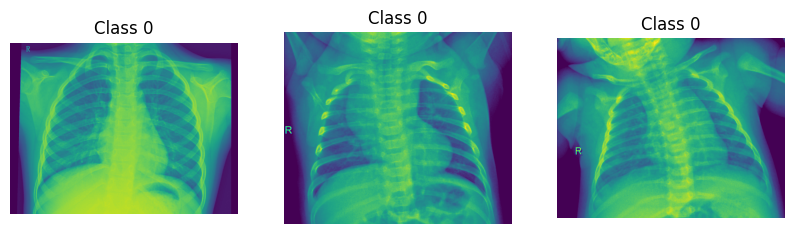

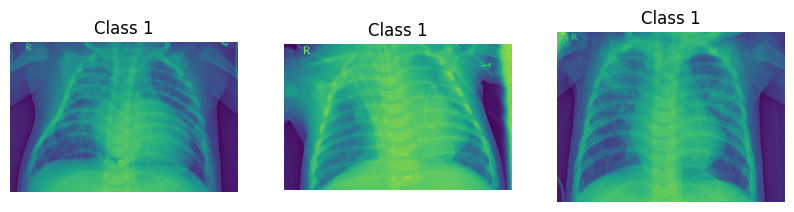

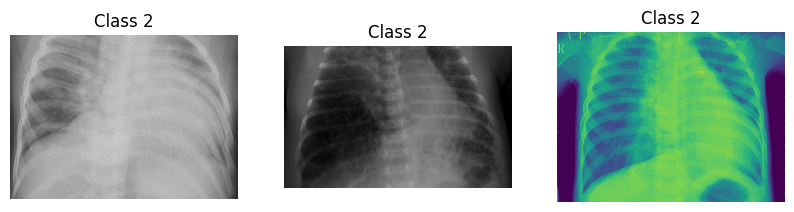

In [14]:
import matplotlib.pyplot as plt
import os

# Display images from the directory
def display_images_from_directory(directory, class_name):
    plt.figure(figsize=(10, 5))
    images = os.listdir(directory)[:3]
    for i, image_name in enumerate(images):
        image_path = os.path.join(directory, image_name)
        img = plt.imread(image_path)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.show()

# Define paths to each class directory
class0_dir = os.path.join(labeled_train_images_path, '0')
class1_dir = os.path.join(labeled_train_images_path, '1')
class2_dir = os.path.join(labeled_train_images_path, '2')

# Display images from each class directory
display_images_from_directory(class0_dir, "Class 0")
display_images_from_directory(class1_dir, "Class 1")
display_images_from_directory(class2_dir, "Class 2")


**Preprocessing**

using TensorFlow's ImageDataGenerator,

ImageDataGenerator: This class in TensorFlow provides powerful methods for loading and augmenting images on-the-fly during training.

Rescale: Normalizes pixel values to the range [0, 1].

rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, horizontal_flip: These are parameters for data augmentation, allowing you to specify different types and ranges of transformations to apply to the images.

Flow_from_directory: Generates batches of augmented data from the specified directory (labeled_train_images_path). It automatically infers class labels from the directory structure.

Target_size: Resizes all images to (img_height, img_width).

Batch_size: Number of images in each batch of data.

Class_mode: Specifies the type of label arrays returned by the generator. Use 'categorical' for multi-class classification.

In [15]:
import tensorflow as tf

# Define paths to each class directory
class0_dir = os.path.join(labeled_train_images_path, '0')
class1_dir = os.path.join(labeled_train_images_path, '1')
class2_dir = os.path.join(labeled_train_images_path, '2')

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerator with preprocessing functions
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Generate batches of augmented data from the directories
train_generator = train_datagen.flow_from_directory(
    labeled_train_images_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    labeled_train_images_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3739 images belonging to 3 classes.
Found 933 images belonging to 3 classes.


To view the labelled images:

The labels are in the format 0.0.1, 0.1.0, 1.0.0  due to the class_mode parameter used when setting up the ImageDataGenerator in TensorFlow/Keras.

Each label is a one-hot encoded vector where each position corresponds to a class.

0.0.1: This correspond to class 2 (one-hot encoded as [0, 0, 1]).
0.1.0: This correspond to class 1 (one-hot encoded as [0, 1, 0]).
1.0.0: This correspond to class 0 (one-hot encoded as [1, 0, 0]).

Position Meaning: Each position in the label array corresponds to a specific class. The position with 1 indicates the class of the image.

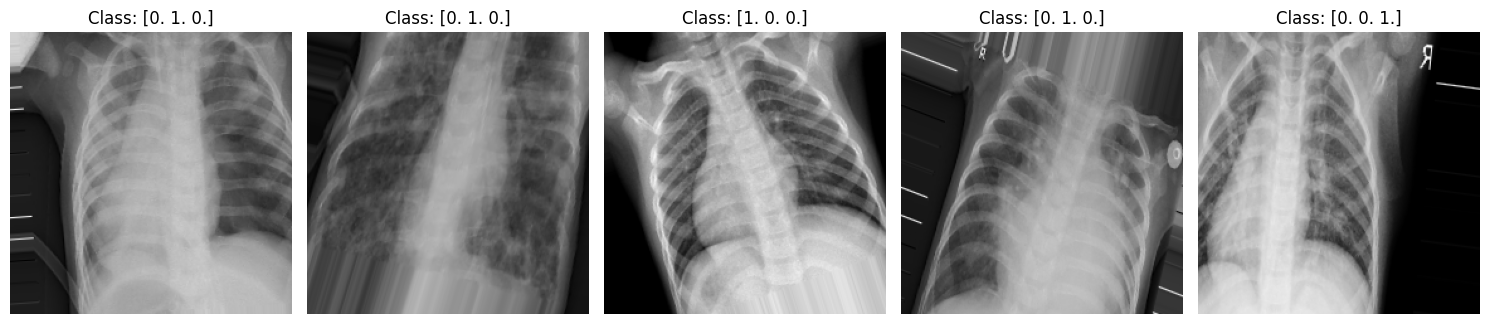

In [16]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the generator
images, labels = train_generator.next()

# Display the first 5 images with their labels
plt.figure(figsize=(15, 7))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Added Class Weights and Split the data into Training and Validation set since there is a seperate folder for test images

In [70]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import shutil
import pandas as pd  # Ensure you have imported pandas

# Define paths
labels_path = '/content/archive-3/labels_train.csv'
train_images_dir = '/content/archive-3/train_images'
test_images_dir = '/content/archive-3/test_images'
labeled_train_images_path = '/content/archive-3/labeled_train_images'

split_data_path = 'split_data'
train_split_path = os.path.join(split_data_path, 'train')
validation_split_path = os.path.join(split_data_path, 'validation')

# Create directories if they don't exist
os.makedirs(train_split_path, exist_ok=True)
os.makedirs(validation_split_path, exist_ok=True)

# Parameters
img_height, img_width = 224, 224
batch_size = 32
val_split = 0.2  # Fraction of data to be used for validation

def split_data(src_dir, train_dest_dir, val_dest_dir, val_split=0.2):
    """
    Split data from src_dir into training and validation sets and copy to destination directories.
    """
    classes = os.listdir(src_dir)
    for class_name in classes:
        class_path = os.path.join(src_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        images = os.listdir(class_path)
        if not images:
            print(f"No images found in class directory {class_path}")
            continue

        train_images, val_images = train_test_split(images, test_size=val_split, random_state=42)

        train_class_dir = os.path.join(train_dest_dir, class_name)
        val_class_dir = os.path.join(val_dest_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        for img in train_images:
            src_img_path = os.path.join(class_path, img)
            dest_img_path = os.path.join(train_class_dir, img)
            shutil.copy(src_img_path, dest_img_path)

        for img in val_images:
            src_img_path = os.path.join(class_path, img)
            dest_img_path = os.path.join(val_class_dir, img)
            shutil.copy(src_img_path, dest_img_path)

# Split the data
split_data(labeled_train_images_path, train_split_path, validation_split_path)

# Create ImageDataGenerator with augmentation and preprocessing functions for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator with rescaling for validation (no augmentation)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data from the training directory
train_generator = train_datagen.flow_from_directory(
    train_split_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Generate batches of data from the validation directory
validation_generator = validation_datagen.flow_from_directory(
    validation_split_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Example: Print class indices
print("Class indices:", train_generator.class_indices)


Found 3736 images belonging to 3 classes.
Found 936 images belonging to 3 classes.
Class indices: {'0': 0, '1': 1, '2': 2}


In [19]:
# Calculate class weights
from sklearn.utils import class_weight
import numpy as np

# Get class indices
class_indices = train_generator.class_indices
num_classes = len(class_indices)

# Create a list of class labels
class_labels = list(class_indices.keys())

# Compute class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.arange(num_classes),
    y=np.array([class_indices[cls] for cls in class_labels])
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)



Class weights: {0: 1.0, 1: 1.0, 2: 1.0}


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3
from tensorflow.keras.optimizers import Adam


Epoch 1/50
117/117 [==============================] - 74s 595ms/step - loss: 1.2656 - accuracy: 0.6055 - val_loss: 0.6501 - val_accuracy: 0.6838 - lr: 1.0000e-04
Epoch 2/50
117/117 [==============================] - 70s 597ms/step - loss: 0.9910 - accuracy: 0.7139 - val_loss: 0.5883 - val_accuracy: 0.7415 - lr: 1.0000e-04
Epoch 3/50
117/117 [==============================] - 70s 597ms/step - loss: 0.9477 - accuracy: 0.7460 - val_loss: 0.6227 - val_accuracy: 0.6966 - lr: 1.0000e-04
Epoch 4/50
117/117 [==============================] - 70s 597ms/step - loss: 0.8396 - accuracy: 0.7821 - val_loss: 0.5339 - val_accuracy: 0.7831 - lr: 1.0000e-04
Epoch 5/50
117/117 [==============================] - 70s 595ms/step - loss: 0.8264 - accuracy: 0.7837 - val_loss: 0.5291 - val_accuracy: 0.7735 - lr: 1.0000e-04
Epoch 6/50
117/117 [==============================] - 69s 590ms/step - loss: 0.8034 - accuracy: 0.7918 - val_loss: 0.5131 - val_accuracy: 0.7810 - lr: 1.0000e-04
Epoch 7/50
117/117 [========

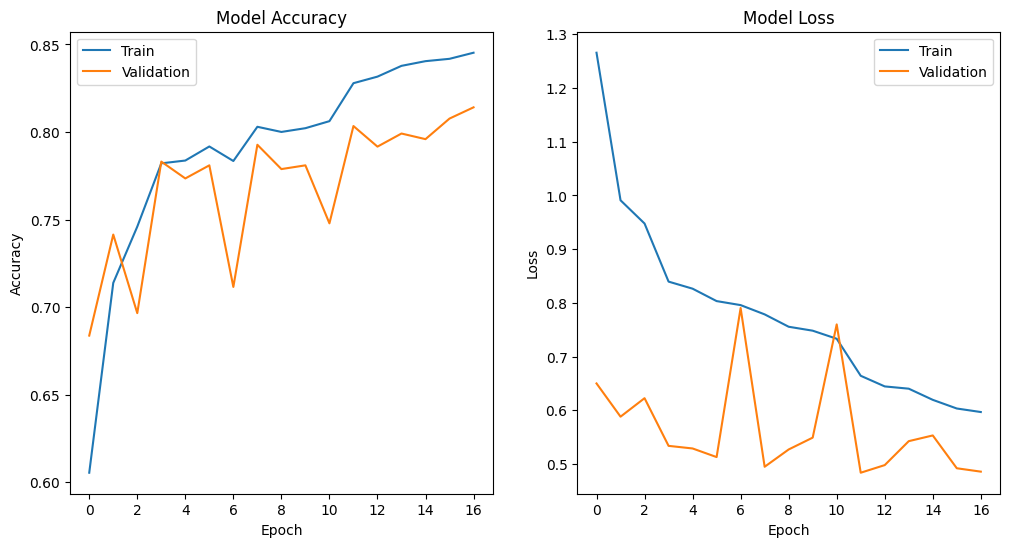

Model saved to saved_model/vgg16_model


In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths
model_save_path = 'saved_model/vgg16_model'

# Load pre-trained VGG16 model without top (fully connected layers)
base_model_vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last block of the base model for fine-tuning
for layer in base_model_vgg16.layers[-4:]:
    layer.trainable = True

# Create a new model on top of the pre-trained base model
model_vgg16 = tf.keras.Sequential([
    base_model_vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_vgg16.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.5}

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # More epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Save the plots
plt.savefig('training_history.png')

# Show plots
plt.show()

# Save the model
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
model_vgg16.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [128]:

# Print the final training and validation accuracy
finalvgg16_train_accuracy = history_vgg16.history['accuracy'][-1]
finalvgg16_val_accuracy = history_vgg16.history['val_accuracy'][-1]

print(f"Final vgg16 Training Accuracy: {finalvgg16_train_accuracy:.4f}")
print(f"Final vgg16 Validation Accuracy: {finalvgg16_val_accuracy:.4f}")

Final vgg16 Training Accuracy: 0.8453
Final vgg16 Validation Accuracy: 0.8141


In [136]:


# Create ImageDataGenerator for test data with only rescaling (no augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate batches of data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_images_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # No labels for test data
    shuffle=False    # Important to keep the order for evaluation
)


Found 1168 images belonging to 1 classes.


Epoch 1/50
117/117 [==============================] - 76s 607ms/step - loss: 1.3520 - accuracy: 0.5707 - val_loss: 0.7815 - val_accuracy: 0.6699 - lr: 1.0000e-04
Epoch 2/50
117/117 [==============================] - 71s 599ms/step - loss: 1.0766 - accuracy: 0.6801 - val_loss: 0.6014 - val_accuracy: 0.7254 - lr: 1.0000e-04
Epoch 3/50
117/117 [==============================] - 71s 599ms/step - loss: 1.0001 - accuracy: 0.7168 - val_loss: 0.5498 - val_accuracy: 0.7746 - lr: 1.0000e-04
Epoch 4/50
117/117 [==============================] - 70s 598ms/step - loss: 0.9086 - accuracy: 0.7492 - val_loss: 0.5548 - val_accuracy: 0.7703 - lr: 1.0000e-04
Epoch 5/50
117/117 [==============================] - 71s 600ms/step - loss: 0.8774 - accuracy: 0.7628 - val_loss: 0.7050 - val_accuracy: 0.7233 - lr: 1.0000e-04
Epoch 6/50
117/117 [==============================] - 71s 607ms/step - loss: 0.8317 - accuracy: 0.7813 - val_loss: 0.5589 - val_accuracy: 0.7714 - lr: 1.0000e-04
Epoch 7/50
117/117 [========

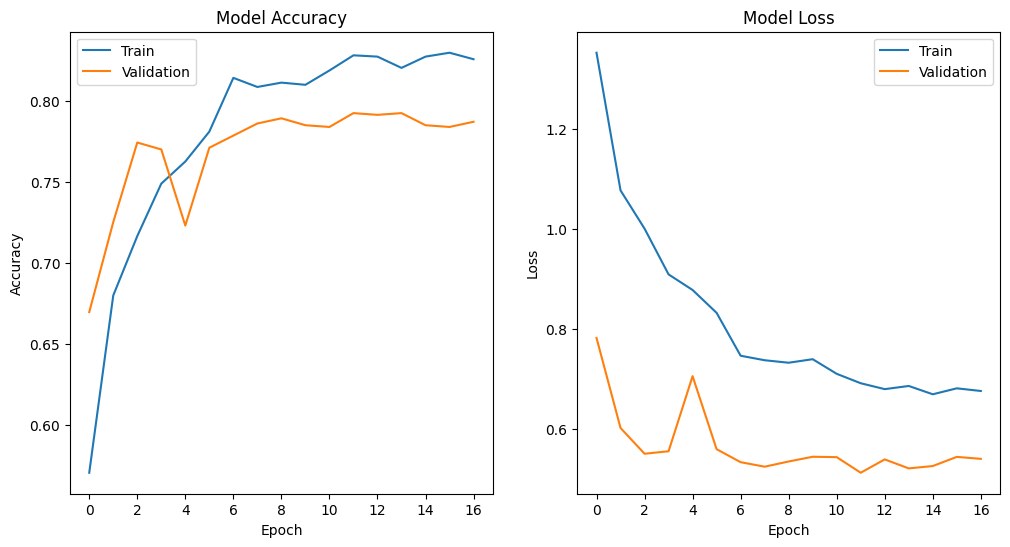

Model saved to saved_model/vgg19_model


In [120]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define paths for saving the model
model_save_path = 'saved_model/vgg19_model'

# Load pre-trained VGG19 model without top (fully connected layers)
base_model_vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last block of the base model for fine-tuning
for layer in base_model_vgg19.layers[-4:]:
    layer.trainable = True

# Create a new model on top of the pre-trained base model
model_vgg19 = tf.keras.Sequential([
    base_model_vgg19,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes (0, 1, 2)
])

# Compile the model with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_vgg19.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.5}

# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Save the plots
plt.savefig('training_history_vgg19.png')

# Show plots
plt.show()

# Save the model
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
model_vgg19.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [129]:

# Print the final training and validation accuracy
finalvgg19_train_accuracy = history_vgg19.history['accuracy'][-1]
finalvgg19_val_accuracy = history_vgg19.history['val_accuracy'][-1]

print(f"Final vgg19 Training Accuracy: {finalvgg19_train_accuracy:.4f}")
print(f"Final vgg19 Validation Accuracy: {finalvgg19_val_accuracy:.4f}")

Final vgg19 Training Accuracy: 0.8260
Final vgg19 Validation Accuracy: 0.7874


Epoch 1/50
117/117 [==============================] - 94s 567ms/step - loss: 0.9946 - accuracy: 0.7329 - val_loss: 3.0146 - val_accuracy: 0.2585 - lr: 1.0000e-04
Epoch 2/50
117/117 [==============================] - 71s 600ms/step - loss: 0.8012 - accuracy: 0.7904 - val_loss: 4.0186 - val_accuracy: 0.2585 - lr: 1.0000e-04
Epoch 3/50
117/117 [==============================] - 70s 597ms/step - loss: 0.7328 - accuracy: 0.8059 - val_loss: 1.2255 - val_accuracy: 0.4754 - lr: 1.0000e-04
Epoch 4/50
117/117 [==============================] - 71s 601ms/step - loss: 0.6702 - accuracy: 0.8244 - val_loss: 1.3548 - val_accuracy: 0.2585 - lr: 1.0000e-04
Epoch 5/50
117/117 [==============================] - 70s 596ms/step - loss: 0.6547 - accuracy: 0.8247 - val_loss: 1.4709 - val_accuracy: 0.2585 - lr: 1.0000e-04
Epoch 6/50
117/117 [==============================] - 69s 589ms/step - loss: 0.6585 - accuracy: 0.8287 - val_loss: 1.5949 - val_accuracy: 0.2618 - lr: 1.0000e-04
Epoch 7/50
117/117 [========

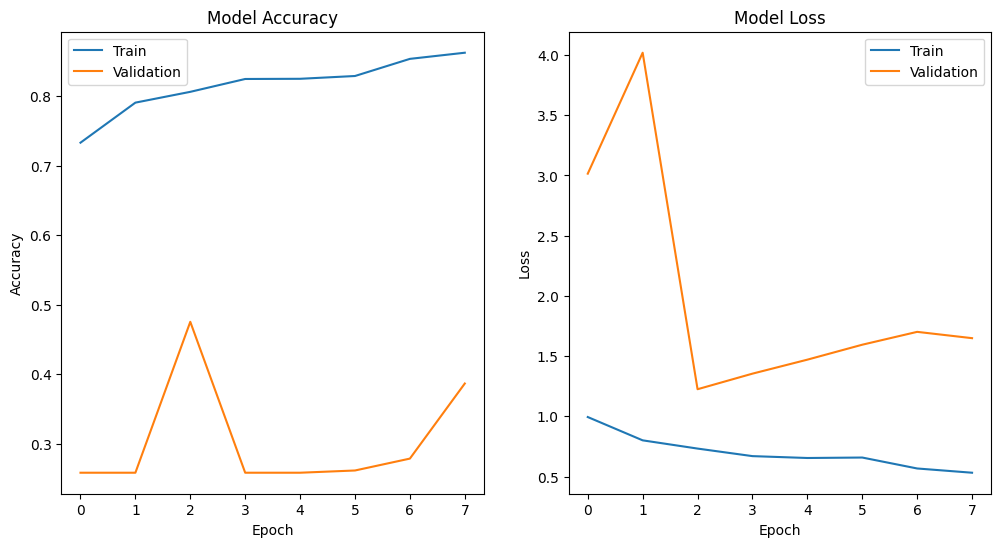

Model saved to saved_model/resnet18_like_model


In [121]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define paths for saving the model
model_save_path = 'saved_model/resnet18_like_model'

# Load pre-trained ResNet50 model without top (fully connected layers) to mimic ResNet18
base_model_resnet18 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last block of the base model for fine-tuning
for layer in model_resnet18.layers[-4:]:
    layer.trainable = True

# Create a new model on top of the pre-trained base model
model_resnet18 = tf.keras.Sequential([
    base_model_resnet18,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes (0, 1, 2)
])


# Compile the model with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_resnet18.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.5}

# Train the model
history_resnet18 = model_resnet18.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_resnet18.history['accuracy'])
plt.plot(history_resnet18.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet18.history['loss'])
plt.plot(history_resnet18.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Save the plots
plt.savefig('training_history_resnet18_like.png')

# Show plots
plt.show()

# Save the model
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
model_resnet18.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [130]:
# Print the final training and validation accuracy
finalresnet18_train_accuracy = history_resnet18.history['accuracy'][-1]
finalresnet18_val_accuracy = history_resnet18.history['val_accuracy'][-1]

print(f"Final resnet18 Training Accuracy: {finalresnet18_train_accuracy:.4f}")
print(f"Final resnet18 Validation Accuracy: {finalresnet18_val_accuracy:.4f}")

Final resnet18 Training Accuracy: 0.8622
Final resnet18 Validation Accuracy: 0.3868


Epoch 1/50
117/117 [==============================] - 145s 695ms/step - loss: 1.0611 - accuracy: 0.7136 - val_loss: 1.7030 - val_accuracy: 0.4786 - lr: 1.0000e-04
Epoch 2/50
117/117 [==============================] - 81s 687ms/step - loss: 0.7825 - accuracy: 0.7942 - val_loss: 2.3040 - val_accuracy: 0.4786 - lr: 1.0000e-04
Epoch 3/50
117/117 [==============================] - 80s 682ms/step - loss: 0.7583 - accuracy: 0.8065 - val_loss: 1.9548 - val_accuracy: 0.4786 - lr: 1.0000e-04
Epoch 4/50
117/117 [==============================] - 81s 686ms/step - loss: 0.7167 - accuracy: 0.8094 - val_loss: 2.3113 - val_accuracy: 0.4915 - lr: 1.0000e-04
Epoch 5/50
117/117 [==============================] - 81s 686ms/step - loss: 0.6293 - accuracy: 0.8367 - val_loss: 1.3774 - val_accuracy: 0.2724 - lr: 2.0000e-05
Epoch 6/50
117/117 [==============================] - 80s 684ms/step - loss: 0.5773 - accuracy: 0.8458 - val_loss: 1.4016 - val_accuracy: 0.2650 - lr: 2.0000e-05
Epoch 7/50
117/117 [=======

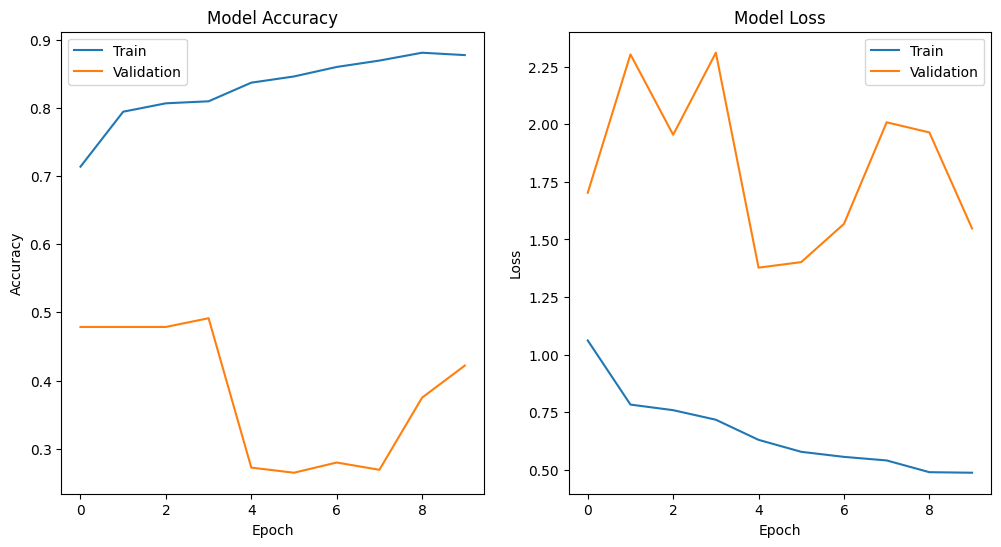

Model saved to saved_model/resnet101_model


In [123]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define paths for saving the model
model_save_path = 'saved_model/resnet101_model'

# Load pre-trained ResNet101 model without top (fully connected layers)
base_model_resnet101 = tf.keras.applications.ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last block of the base model for fine-tuning
for layer in model_resnet101.layers[-4:]:
    layer.trainable = True

# Create a new model on top of the pre-trained base model
model_resnet101 = tf.keras.Sequential([
    base_model_resnet101,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes (0, 1, 2)
])


# Compile the model with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_resnet101.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.5}

# Train the model
history_resnet101 = model_resnet101.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_resnet101.history['accuracy'])
plt.plot(history_resnet101.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet101.history['loss'])
plt.plot(history_resnet101.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Save the plots
plt.savefig('training_history_resnet101.png')

# Show plots
plt.show()

# Save the model
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
model_resnet101.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [131]:

# Print the final training and validation accuracy
finalresnet101_train_accuracy = history_resnet101.history['accuracy'][-1]
finalresnet101_val_accuracy = history_resnet101.history['val_accuracy'][-1]

print(f"Final resnet101 Training Accuracy: {finalresnet101_train_accuracy:.4f}")
print(f"Final  resnet101 Validation Accuracy: {finalresnet101_val_accuracy:.4f}")

Final resnet101 Training Accuracy: 0.8771
Final  resnet101 Validation Accuracy: 0.4220


Epoch 1/50
117/117 [==============================] - 91s 554ms/step - loss: 0.6657 - accuracy: 0.8247 - val_loss: 0.7119 - val_accuracy: 0.7714 - lr: 1.0000e-04
Epoch 2/50
117/117 [==============================] - 69s 587ms/step - loss: 0.6164 - accuracy: 0.8442 - val_loss: 0.6177 - val_accuracy: 0.7981 - lr: 1.0000e-04
Epoch 3/50
117/117 [==============================] - 68s 584ms/step - loss: 0.6021 - accuracy: 0.8466 - val_loss: 0.5946 - val_accuracy: 0.7970 - lr: 1.0000e-04
Epoch 4/50
117/117 [==============================] - 69s 587ms/step - loss: 0.5717 - accuracy: 0.8496 - val_loss: 0.7751 - val_accuracy: 0.7756 - lr: 1.0000e-04
Epoch 5/50
117/117 [==============================] - 70s 593ms/step - loss: 0.5488 - accuracy: 0.8622 - val_loss: 0.5024 - val_accuracy: 0.8034 - lr: 1.0000e-04
Epoch 6/50
117/117 [==============================] - 69s 586ms/step - loss: 0.5546 - accuracy: 0.8608 - val_loss: 0.5114 - val_accuracy: 0.7821 - lr: 1.0000e-04
Epoch 7/50
117/117 [========

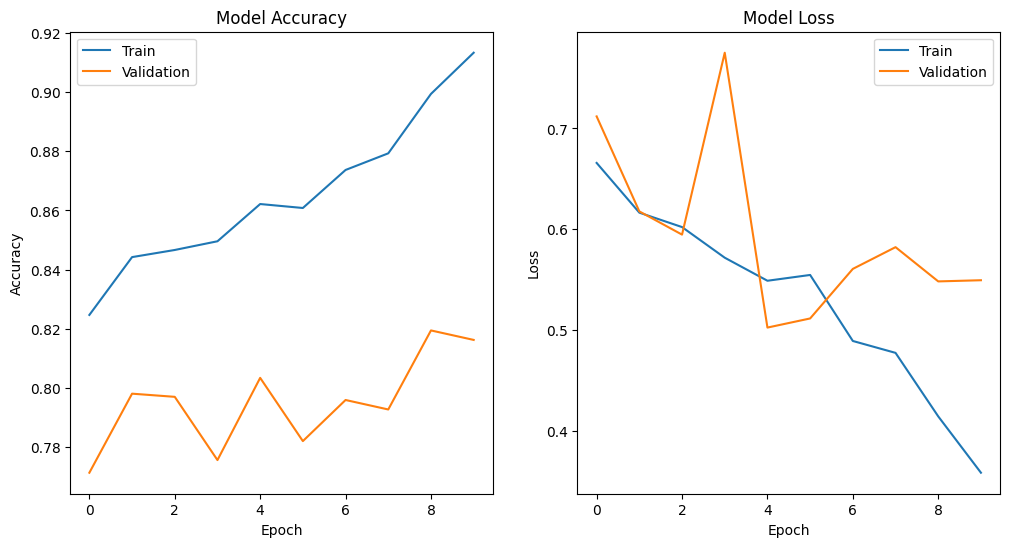

Model saved to saved_model/inceptionv3_model


In [132]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define paths for saving the model
model_save_path = 'saved_model/inceptionv3_model'

# Load pre-trained InceptionV3 model without top (fully connected layers)
base_model_googlenet = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of InceptionV3 base model
for layer in base_model_googlenet.layers[-4:]:
    layer.trainable = True


# Compile the model with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_googlenet.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.5}

# Train the model
history_googlenet = model_googlenet.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_googlenet.history['accuracy'])
plt.plot(history_googlenet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_googlenet.history['loss'])
plt.plot(history_googlenet.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Save the plots
plt.savefig('training_history_googlenet.png')

# Show plots
plt.show()

# Save the model
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
model_googlenet.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [134]:

# Print the final training and validation accuracy
finalgooglenet_train_accuracy = history_googlenet.history['accuracy'][-1]
finalgooglenet_val_accuracy = history_googlenet.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {finalgooglenet_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {finalgooglenet_val_accuracy:.4f}")


Final Training Accuracy: 0.9133
Final Validation Accuracy: 0.8162


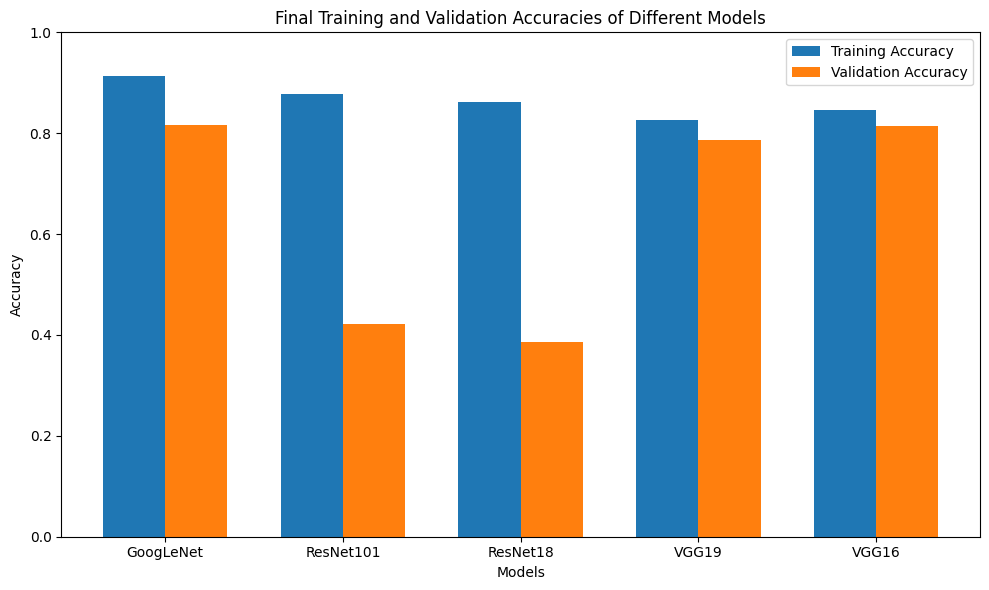

In [135]:
import matplotlib.pyplot as plt

# Final training and validation accuracies for each model
models = ['GoogLeNet', 'ResNet101', 'ResNet18', 'VGG19', 'VGG16']
train_accuracies = [
    history_googlenet.history['accuracy'][-1],
    history_resnet101.history['accuracy'][-1],
    history_resnet18.history['accuracy'][-1],
    history_vgg19.history['accuracy'][-1],
    history_vgg16.history['accuracy'][-1]
]
val_accuracies = [
    history_googlenet.history['val_accuracy'][-1],
    history_resnet101.history['val_accuracy'][-1],
    history_resnet18.history['val_accuracy'][-1],
    history_vgg19.history['val_accuracy'][-1],
    history_vgg16.history['val_accuracy'][-1]
]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar([i + bar_width for i in index], val_accuracies, bar_width, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Final Training and Validation Accuracies of Different Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
